In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filters_sampling_rate = 2.5e6
regressions = pd.read_pickle('regression-models.pkl')
regressions.head()

,fish_id,zone,input_noise_std,model_id,train_error,valid_error,coefficients,regression
0,fish_01,dlz,0.0,0,0.025806,135675.983363,"[-0.057603490410812586, -5889982942.07103, -19...",LinearRegression()
1,fish_01,mz,0.0,0,0.021480,1400.385826,"[149467457470.03458, 5515905873.758586, 592640...",LinearRegression()
2,fish_02,dlz,0.0,0,0.087094,47402.603978,"[0.26376079045223216, -106802991287.6408, 8982...",LinearRegression()
3,fish_03,dlz,0.0,0,0.059018,8402.389187,"[-5592790616709.332, -207145641599.6488, 60598...",LinearRegression()
4,fish_03,mz,0.0,0,0.026068,48358.767240,"[-481915821602.5177, 392612025521.46515, -1019...",LinearRegression()


### Plot distributions of train and valid errors

In [3]:
train_errors = regressions[["input_noise_std", "train_error", "zone"]].copy()
train_errors["error"] = train_errors["train_error"]
train_errors.drop(columns="train_error", inplace=True)
train_errors["set"] = "train"

valid_errors = regressions[["input_noise_std", "valid_error", "zone"]].copy()
valid_errors["error"] = valid_errors["valid_error"]
valid_errors.drop(columns="valid_error", inplace=True)
valid_errors["set"] = "valid"

regression_errors = pd.concat(
    [train_errors, valid_errors],
    axis=0,
    ignore_index=True,
)

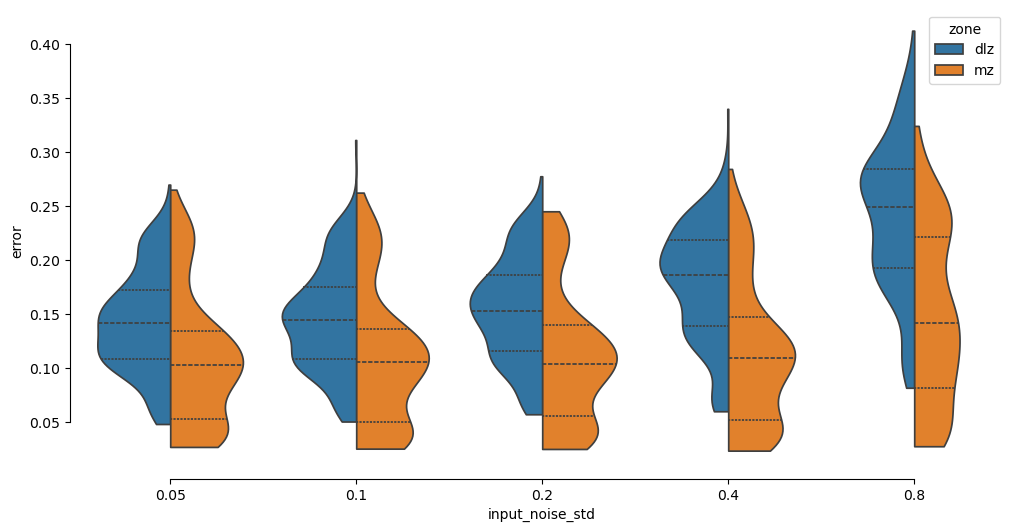

In [4]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=valid_errors[valid_errors["input_noise_std"]>0], x="input_noise_std", y="error", hue="zone", cut=0, split=True, inner="quart")
# sns.violinplot(data=regression_errors, x="input_noise_std", y="error", hue="set", cut=0, split=True, inner="quart")
# sns.scatterplot(data=regression_errors, x="input_noise_std", y="error", hue="set", alpha=0.1)
# sns.lineplot(data=train_errors, x="input_noise_std", y="error", color="blue", label="train")
# plt.plot([0.03, 0.6], [0.2,0.3], 'k')
sns.despine(offset=5, trim=True)

### Plot the regression coefficients

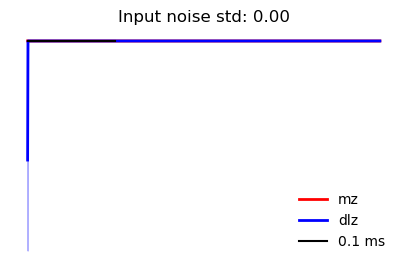

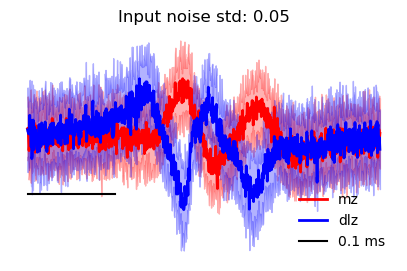

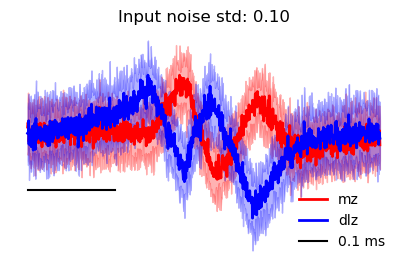

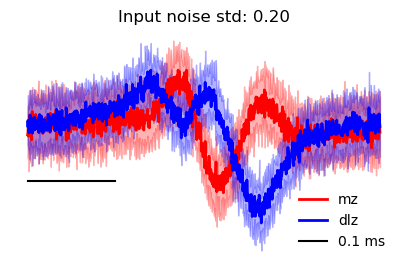

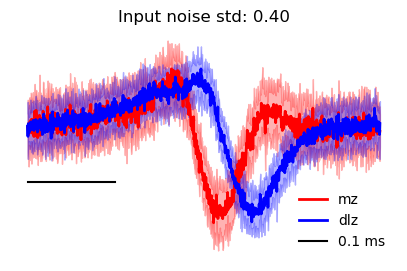

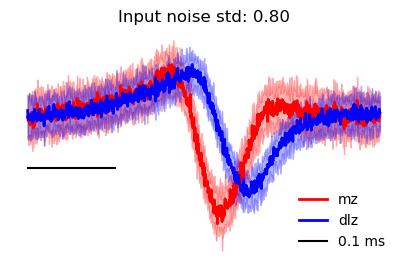

""


In [5]:
def plot_coefficients(df, sampling_rate=filters_sampling_rate):
    plt.figure(figsize=(5, 3))
    coefficients = np.vstack(df[df["zone"] == "mz"]["coefficients"])
    coefficients_mean = coefficients.mean(axis=0)
    coefficients = coefficients / coefficients_mean.max()
    coefficients_mean = coefficients_mean / coefficients_mean.max()
    # plt.plot(coefficients.T, color="black", alpha=0.1, lw=0.1)
    plt.plot(coefficients_mean, color="red", lw=2, label="mz")
    plt.fill_between(
        x=np.arange(coefficients.shape[1]),
        y1=coefficients_mean - coefficients.std(axis=0),
        y2=coefficients_mean + coefficients.std(axis=0),
        color="red",
        alpha=0.3,
    )
    coefficients = np.vstack(df[df["zone"] == "dlz"]["coefficients"])
    coefficients_mean = coefficients.mean(axis=0)
    coefficients = coefficients / coefficients_mean.max()
    coefficients_mean = coefficients_mean / coefficients_mean.max()
    # plt.plot(coefficients.T, color="black", alpha=0.1, lw=0.1)
    plt.plot(coefficients_mean, color="blue", lw=2, label="dlz")
    plt.fill_between(
        x=np.arange(coefficients.shape[1]),
        y1=coefficients_mean - coefficients.std(axis=0),
        y2=coefficients_mean + coefficients.std(axis=0),
        color="blue",
        alpha=0.3,
    )
    plt.plot([0, 0.1e-3 * sampling_rate], [-1, -1], "k", label="0.1 ms")
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.title(f"Input noise std: {df['input_noise_std'].iloc[0]:.2f}")
    plt.legend(loc=4, frameon=False)
    plt.show()
    plt.close()
    pass


regressions[regressions["fish_id"] == "fish"].groupby("input_noise_std").apply(plot_coefficients)